### Given two list of x and y coordinates, and a list of errors on y, find the parabola that minimizes the sum of square distances between the parabola and the (x,y) points.

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

In [22]:
xx, yy, aa, bb, cc, dd = symbols('xx yy aa bb cc dd')

In [23]:
xdataor = np.array([18.2,28.2,38.2,48.2,58.2,68.2,78.2,88.2,98.2])/(10**2)
npoint = len(xdataor)
npoint
ax,bx = float(xdataor[0]),float(xdataor[npoint-1])
apx,bpx = 2./(bx-ax),(bx + ax)/(bx - ax)
print(ax)
print(bx)
print(apx)
print(bpx)
xdata = xdataor*apx - bpx
xdata
xdata=xdataor

0.182
0.982
2.5
1.4549999999999998


In [24]:
ydata = np.array([2.027,2.003,1.984,1.971,1.964,1.965,1.975,1.993,2.022])
yerr = np.array([0.001]*9)
if (len(xdata)!=len(ydata)): print ("dimensioni vettori disuguali")
if (len(yerr)!=len(ydata)): print ("dimensioni vettori disuguali")
#ydata

We want to find the parameters $a$,$b$,$c$ and $d$ of the cubic $y = d x^3 +c x^2 + b x + a$ which minimize:
$ \chi^2 = \sum_i \frac{(y_i - d x^3-c x_i^2 - b x_i - a)^2}{\sigma_i^2}$

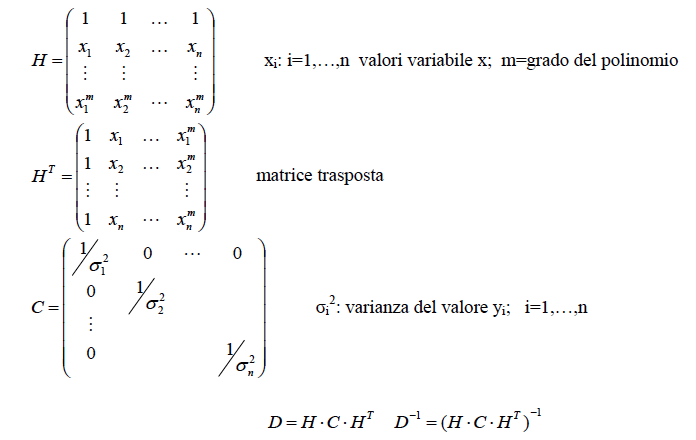

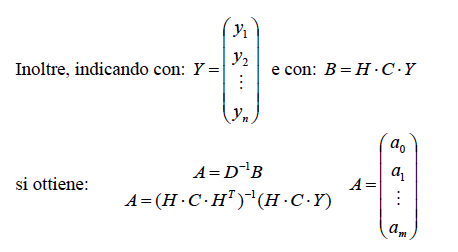

Calcolo matrice H e matrice trasposta

In [25]:
vect1=np.array([1]*9)
vect2=xdata
vect3=xdata**2
vect4=xdata**3
matH=np.matrix([vect1,vect2,vect3,vect4])
matHT = matH.T
#matH,matHT

calcolo matrice della varianza

In [26]:
varyinv = 1./(yerr*yerr)
matC=np.diag(varyinv)
#varyinv,matC

In [27]:
ydataprovv=ydata
matY=ydataprovv.reshape((-1, 1))
#matY

calcolo matrice A dei parametri

In [28]:
mat1=matH*matC*matHT
mat1_inv=np.linalg.inv(mat1)
mat2=matH*matC*matY
matA=np.dot(mat1_inv,mat2)
#matA

In [29]:
a, b, c, d = matA[0],matA[1],matA[2],matA[3]
print (" a = ", a)
print (" b = ", b)
print (" c = ", c)
print (" d = ", d)

 a =  [[2.08048383]]
 b =  [[-0.32144061]]
 c =  [[0.12530519]]
 d =  [[0.14393939]]


In [30]:
vara, varb, varc, vard = mat1_inv[0,0], mat1_inv[1,1], mat1_inv[2,2],mat1_inv[3,3]
erra=np.sqrt(vara)
errb=np.sqrt(varb)
errc=np.sqrt(varc)
errd=np.sqrt(vard)
print (" errore su a = ",erra)
print (" errore su b = ",errb)
print (" errore su c = ",errc)
print (" errore su d = ",errd)

 errore su a =  0.0038281125103655053
 errore su b =  0.024729190805497254
 errore su c =  0.04659266705583783
 errore su d =  0.02648507192348592


Plot, adding extra points for the cubic.

In [16]:
thickxdata = np.arange(0.1,1.05,0.01)
thx2=thickxdata**2
thx3=thickxdata**3
thydata=d*thx3+c*thx2+b*thickxdata+a
thiyarr=np.array(thydata)
thickydata=thiyarr.T

<ErrorbarContainer object of 3 artists>

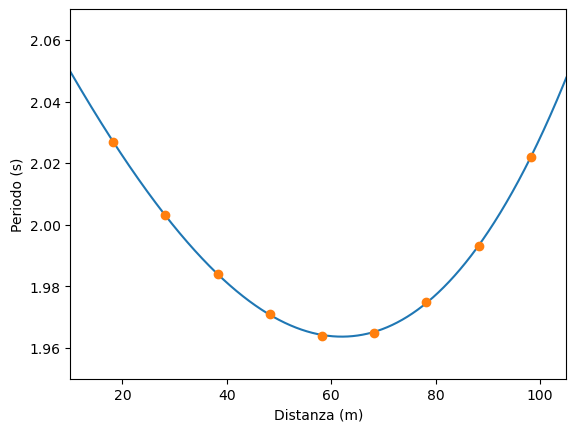

In [20]:
fig, ax = plt.subplots()
ax.set_xlabel('Distanza (m)')
ax.set_ylabel('Periodo (s)')
ax.set_xlim(0.1, 1.05); ax.set_ylim(1.950, 2.070) 
plt.plot(thickxdata,thickydata)
plt.errorbar(xdata,ydata,yerr=yerr,fmt='o')

In [13]:
x2=xdata**2
x3=xdata**3
thyatt=d*x3+c*x2+b*xdata+a
ydatatt=np.array(thyatt)
scarto1 = (ydata-ydatatt)/yerr
scarto2 = (ydata-ydatatt)
chi2 = (scarto1*scarto1).sum()
errstSq = (scarto2*scarto2/(npoint-4)).sum()
errst = np.sqrt(errstSq)
print (" Chi^2 = ",chi2)
print (" errore standard della stima = ",errst)

 Chi^2 =  0.3658008658007487
 errore standard della stima =  0.0002704813730373124


In [14]:
sum_y = (ydata).sum()
ymean=sum_y/npoint
ameany = ydata-ymean
vary = (ameany*ameany).sum()
scarto3=ydatatt-ymean
var_numeratore=(scarto3*scarto3).sum()
detercoeff2=var_numeratore/vary
detercoeff=np.sqrt(detercoeff2)
print ("coefficiente determinazione = ",detercoeff)

coefficiente determinazione =  0.9999592641113184
